In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#import statannotations
from statannot import add_stat_annotation


In [2]:
# Open datasets

data_20 = pd.read_csv('../data/img_scout_dfs/2020/INC_coreg_skysat_scout_2020.csv')
data_21 = pd.read_csv('../data/img_scout_dfs/2021/INC_skysat_scout_2021.csv')
data_22 = pd.read_csv('../data/img_scout_dfs/2022/INC_skysat_scout_2022.csv')

dfs = [data_20, data_21, data_22]

In [3]:
# Add VIs
def add_vis(df):
    df['ndvi']= (df['nir']-df['red'])/(df['nir']+df['red'])
    df['evi']= 2.5*(df['nir']-df['red'])/(df['nir']+6*df['red']-7.5*df['blue']+1)
    df['savi']= 1.5*(df['nir']-df['red'])/(df['nir']+df['red']+0.5)
    df['arvi']=(df['nir']-(2*df['red']-df['blue']))/(df['nir']+(2*df['red']-df['blue']))
    df['grvi']=(df['green']-df['red'])/(df['green']+df['red'])
    df['bgvi'] = df['blue']-df['green']/df['blue']+df['green']
    df['gcc']=df['green']/(df['green']+df['red']+df['blue'])
    df['gri']=df['green']/df['red']
    #df['sr']= df['nir']/df['red']
    #df['msr']= ((df['nir']/df['red'])-1)/(np.sqrt((df['nir']/df['red'])+1))
    #df['dvi']= df['nir']-df['red']
    #df['nirv']= df['ndvi']*df['nir']
    #df['tvi']=0.5*(120*(df['nir']-df['green'])-200*(df['red']-df['green']))
    return df

In [4]:
for df in dfs:
    add_vis(df)
    
    df['inc_class'] = 'low'
    df.loc[df['DM_inc']>25,'inc_class']= 'high'
    
    df['severity_class'] = 'low'
    df.loc[df['DM_severity']>10,'severity_class']= 'high'
    
    df.loc[df['ndvi']<=0.65,'ndvi_group']= '<0.65'
    df.loc[(df['ndvi']> 0.65)&(df['ndvi']<=0.7),'ndvi_group']='0.66-0.70'
    df.loc[(df['ndvi']> 0.7)&(df['ndvi']<=0.75),'ndvi_group']='0.71-0.75'
    df.loc[(df['ndvi']> 0.75)&(df['ndvi']<=0.8),'ndvi_group']='0.76-0.80'
    df.loc[(df['ndvi']> 0.8)&(df['ndvi']<=0.85),'ndvi_group']='0.81-0.85'
    df.loc[(df['ndvi']> 0.85),'ndvi_group']='>0.85'


<AxesSubplot: xlabel='ndvi', ylabel='Count'>

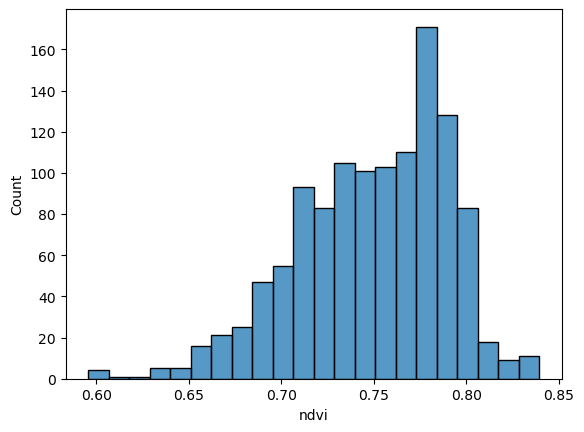

In [5]:
# Check NDVI distribution

sns.histplot(data=data_21, x='ndvi')

In [5]:
data_21.ndvi.min()

0.5958413171527928

In [6]:
data_21['ndvi_group'] = ''

data_21.loc[data_21['ndvi']<=0.65,'ndvi_group']= '0.59-0.65'
               
data_21.loc[(data_21['ndvi']> 0.65)&(data_21['ndvi']<=0.7),'ndvi_group']='0.66-0.70'

data_21.loc[(data_21['ndvi']> 0.7)&(data_21['ndvi']<=0.75),'ndvi_group']='0.71-0.75'
data_21.loc[(data_21['ndvi']> 0.75)&(data_21['ndvi']<=0.8),'ndvi_group']='0.76-0.80'
data_21.loc[(data_21['ndvi']> 0.8)&(data_21['ndvi']<=0.85),'ndvi_group']='0.81-0.85'

In [7]:
data_21['severity_class'] = 'low'

data_21.loc[data_21['DM_severity']>10,'severity_class']= 'high'

Text(0.5, 1.0, 'GRVI by DM Severity, Aggregated by NDVI\n 2021')

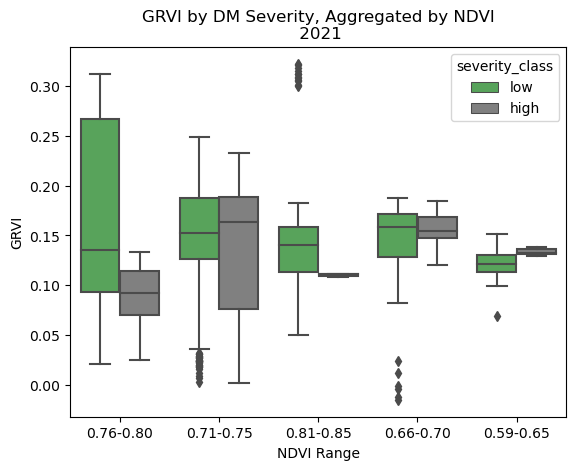

In [9]:
colors = ["#4CAF50", "#808080"]#"#FFDD33"]
sns.set_palette(colors)
sns.boxplot(data=data_21, x="ndvi_group", y="grvi", hue="severity_class")
plt.xlabel('NDVI Range')
plt.ylabel('GRVI')
plt.title("GRVI by DM Severity, Aggregated by NDVI\n 2021")

In [10]:
order = data_21['ndvi_group'].unique()
order

array(['0.76-0.80', '0.71-0.75', '0.81-0.85', '0.66-0.70', '0.59-0.65'],
      dtype=object)

In [11]:
order_rev = order[::-1] 
order_rev

array(['0.59-0.65', '0.66-0.70', '0.81-0.85', '0.71-0.75', '0.76-0.80'],
      dtype=object)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.66-0.70_low v.s. 0.66-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.378e-01 U_stat=1.204e+03
0.59-0.65_low v.s. 0.59-0.65_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.746e-01 U_stat=1.300e+01
0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.662e-01 U_stat=1.118e+04
0.76-0.80_low v.s. 0.76-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.058e-06 U_stat=1.583e+04
0.81-0.85_low v.s. 0.81-0.85_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.390e-01 U_stat=1.710e+02


Text(0.5, 1.0, 'EVI by NDVI Range 2021')

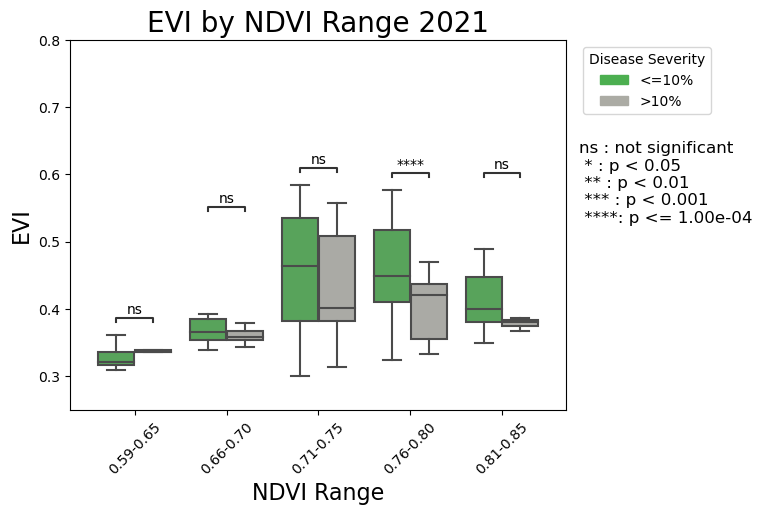

In [27]:
x = "ndvi_group"
y = "evi"
hue = "severity_class"
hue_order=['low', 'high']
order = ['0.59-0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low")),
    ((order[4], "high"), (order[4], "low"))
    ]

colors = ["#4CAF50", "#ABABA4"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['0.59-0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85'], 
                   rotation=45)
add_stat_annotation(ax, data=data_21, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=16)
plt.ylabel("EVI", fontsize= 16)

plt.ylim(0.25, 0.8)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

import matplotlib.patches as mpatches
low_patch = mpatches.Patch(color='#4CAF50', label='<=10%')
high_patch = mpatches.Patch(color='#ABABA4', label='>10%')

plt.legend(title='Disease Severity',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
plt.title("EVI by NDVI Range 2021", fontsize=20)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.66-0.70_low v.s. 0.66-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.250e-02 U_stat=1.457e+03
0.59-0.65_low v.s. 0.59-0.65_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.487e-01 U_stat=1.200e+01
0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.859e-03 U_stat=1.223e+04
0.76-0.80_low v.s. 0.76-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.872e-08 U_stat=1.680e+04
0.81-0.85_low v.s. 0.81-0.85_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.390e-01 U_stat=1.710e+02


Text(0.5, 1.0, 'ARVI 2021, All Rows')

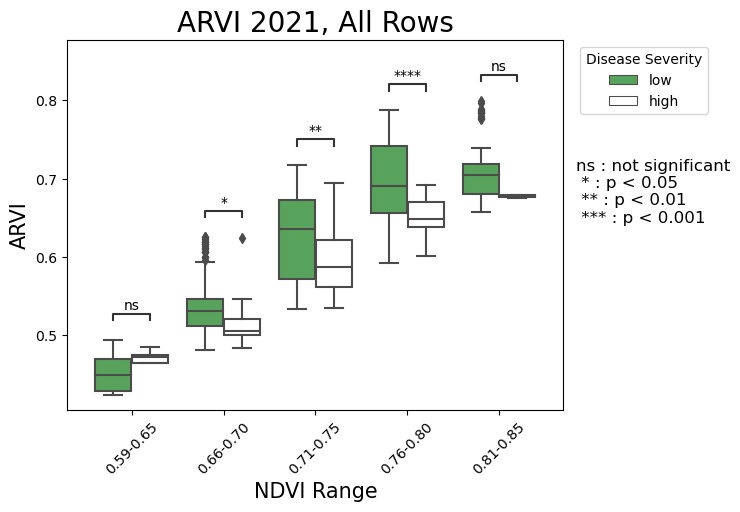

In [13]:
x = "ndvi_group"
y = "arvi"
hue = "severity_class"
hue_order=['low', 'high']
order = ['0.59-0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low")),
    ((order[4], "high"), (order[4], "low"))
    ]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.59-0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85'], 
                   rotation=45)
add_stat_annotation(ax, data=data_21, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=15)
plt.ylabel("ARVI", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("ARVI 2021, All Rows", fontsize=20)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.66-0.70_low v.s. 0.66-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.106e-01 U_stat=1.251e+03
0.59-0.65_low v.s. 0.59-0.65_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.746e-01 U_stat=1.300e+01
0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.543e-01 U_stat=1.120e+04
0.76-0.80_low v.s. 0.76-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.890e-05 U_stat=1.532e+04
0.81-0.85_low v.s. 0.81-0.85_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.388e-01 U_stat=1.680e+02


Text(0.5, 1.0, 'SAVI 2021, All Rows')

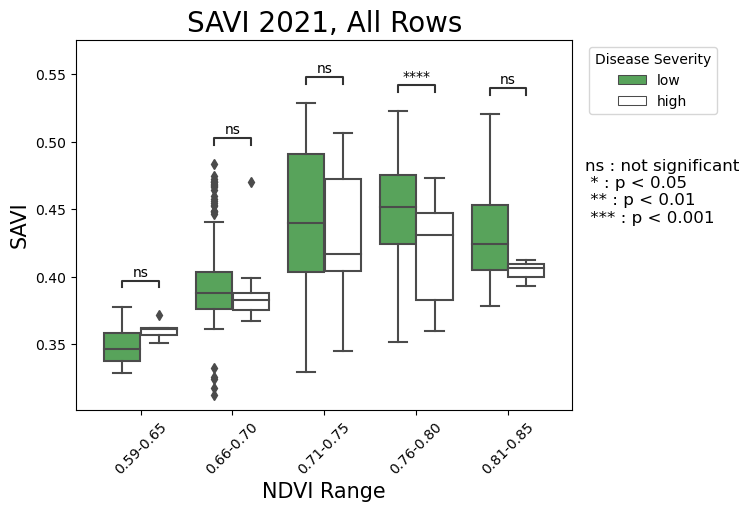

In [14]:
x = "ndvi_group"
y = "savi"
hue = "severity_class"
hue_order=['low', 'high']
order = ['0.59-0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low")),
    ((order[4], "high"), (order[4], "low"))
    ]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.59-0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85'], 
                   rotation=45)
add_stat_annotation(ax, data=data_21, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=15)
plt.ylabel("SAVI", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("SAVI 2021, All Rows", fontsize=20)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.66-0.70_low v.s. 0.66-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.015e+03
0.59-0.65_low v.s. 0.59-0.65_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.746e-01 U_stat=1.300e+01
0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=9.582e+03
0.76-0.80_low v.s. 0.76-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.032e-07 U_stat=1.638e+04
0.81-0.85_low v.s. 0.81-0.85_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.388e-01 U_stat=1.680e+02


Text(0.5, 1.0, 'GRI 2021, All Rows')

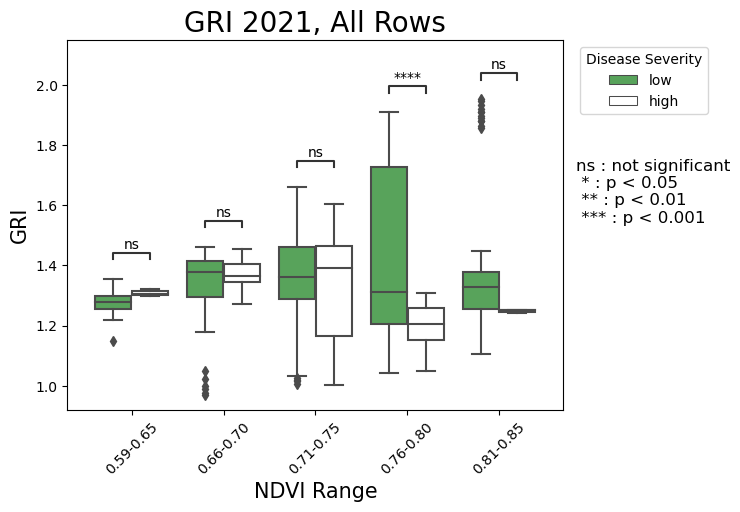

In [15]:
x = "ndvi_group"
y = "gri"
hue = "severity_class"
hue_order=['low', 'high']
order = ['0.59-0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low")),
    ((order[4], "high"), (order[4], "low"))
    ]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.59-0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85'], 
                   rotation=45)
add_stat_annotation(ax, data=data_21, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=15)
plt.ylabel("GRI", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("GRI 2021, All Rows", fontsize=20)


In [16]:
dm_only = data_21.loc[data_21['Block']=='DM']
dm_only.Block.unique()

array(['DM'], dtype=object)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.66-0.70_low v.s. 0.66-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.750e-03 U_stat=2.520e+02
0.59-0.65_low v.s. 0.59-0.65_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.524e-01 U_stat=9.000e+00
0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.678e-06 U_stat=3.809e+03
0.76-0.80_low v.s. 0.76-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.856e-07 U_stat=4.777e+03
0.81-0.85_low v.s. 0.81-0.85_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.800e+01


Text(0.5, 1.0, 'EVI 2021, DM Trial only')

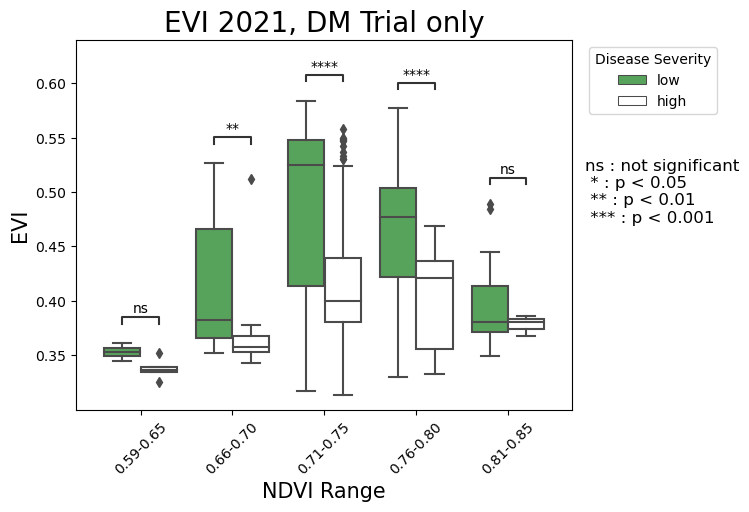

In [17]:
x = "ndvi_group"
y = "evi"
hue = "severity_class"
hue_order=['low', 'high']
order = ['0.59-0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low")),
    ((order[4], "high"), (order[4], "low"))
    ]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=dm_only, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.59-0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85'], 
                   rotation=45)
add_stat_annotation(ax, data=dm_only, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=15)
plt.ylabel("EVI", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("EVI 2021, DM Trial only", fontsize=20)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.66-0.70_low v.s. 0.66-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.340e+02
0.59-0.65_low v.s. 0.59-0.65_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=5.000e+00
0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.873e+03
0.76-0.80_low v.s. 0.76-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.649e-08 U_stat=4.841e+03
0.81-0.85_low v.s. 0.81-0.85_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.600e+01


Text(0.5, 1.0, 'GRI 2021, DM Trial only')

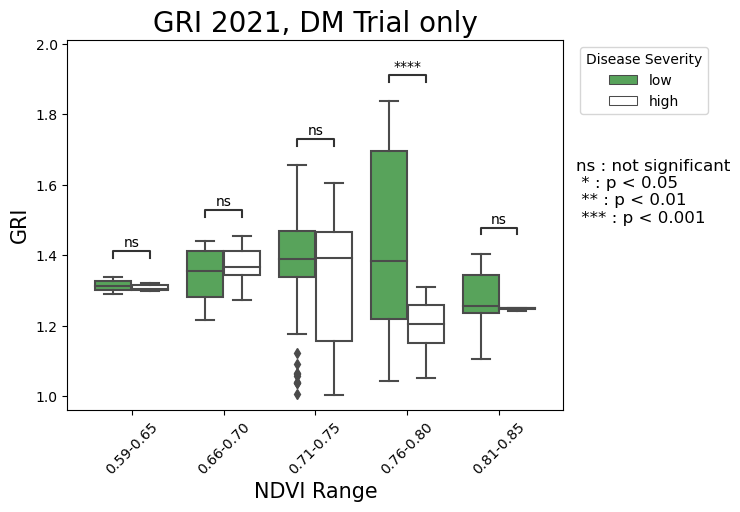

In [18]:
x = "ndvi_group"
y = "gri"
hue = "severity_class"
hue_order=['low', 'high']
order = ['0.59-0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low")),
    ((order[4], "high"), (order[4], "low"))
    ]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=dm_only, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.59-0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85'], 
                   rotation=45)
add_stat_annotation(ax, data=dm_only, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=15)
plt.ylabel("GRI", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("GRI 2021, DM Trial only", fontsize=20)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.66-0.70_low v.s. 0.66-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.295e-01 U_stat=2.210e+02
0.59-0.65_low v.s. 0.59-0.65_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=5.000e+00
0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.565e-05 U_stat=3.765e+03
0.76-0.80_low v.s. 0.76-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.484e-10 U_stat=5.064e+03
0.81-0.85_low v.s. 0.81-0.85_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.700e+01


Text(0.5, 1.0, 'ARVI 2021, DM Trial only')

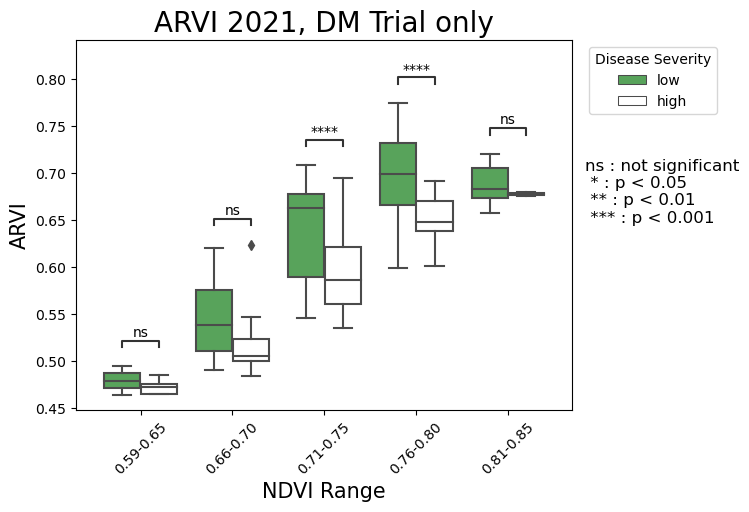

In [19]:
x = "ndvi_group"
y = "arvi"
hue = "severity_class"
hue_order=['low', 'high']
order = ['0.59-0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low")),
    ((order[4], "high"), (order[4], "low"))
    ]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=dm_only, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.59-0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85'], 
                   rotation=45)
add_stat_annotation(ax, data=dm_only, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=15)
plt.ylabel("ARVI", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("ARVI 2021, DM Trial only", fontsize=20)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.66-0.70_low v.s. 0.66-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.550e-03 U_stat=2.540e+02
0.59-0.65_low v.s. 0.59-0.65_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.524e-01 U_stat=9.000e+00
0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.152e-05 U_stat=3.781e+03
0.76-0.80_low v.s. 0.76-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.149e-05 U_stat=4.535e+03
0.81-0.85_low v.s. 0.81-0.85_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.700e+01


Text(0.5, 1.0, 'SAVI 2021, DM Trial only')

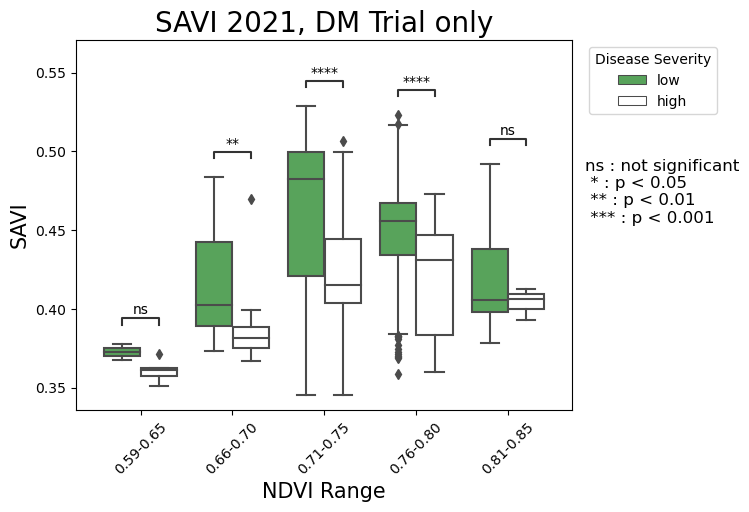

In [20]:
x = "ndvi_group"
y = "savi"
hue = "severity_class"
hue_order=['low', 'high']
order = ['0.59-0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low")),
    ((order[4], "high"), (order[4], "low"))
    ]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=dm_only, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.59-0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85'], 
                   rotation=45)
add_stat_annotation(ax, data=dm_only, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=15)
plt.ylabel("SAVI", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("SAVI 2021, DM Trial only", fontsize=20)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.66-0.70_low v.s. 0.66-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.290e+02
0.59-0.65_low v.s. 0.59-0.65_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.524e-01 U_stat=1.000e+00
0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.820e-01 U_stat=2.121e+03
0.76-0.80_low v.s. 0.76-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.665e-03 U_stat=4.030e+03
0.81-0.85_low v.s. 0.81-0.85_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.300e+01


Text(0.5, 1.0, 'GCC 2021, DM Trial only')

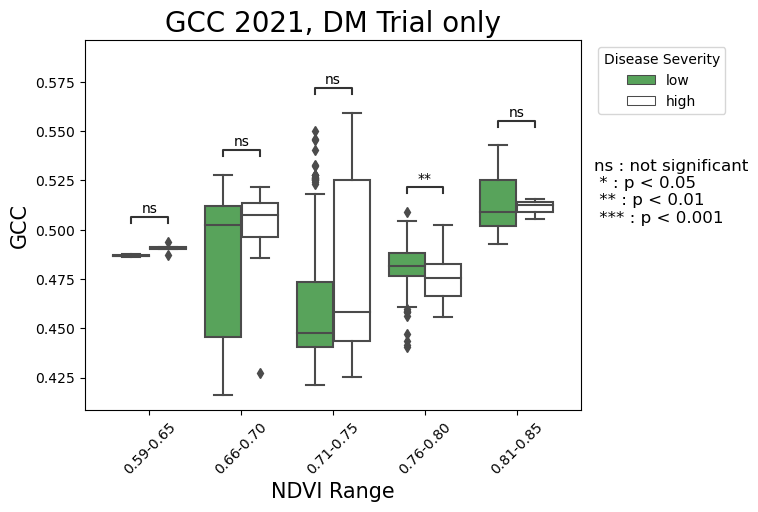

In [21]:
x = "ndvi_group"
y = "gcc"
hue = "severity_class"
hue_order=['low', 'high']
order = ['0.59-0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low")),
    ((order[4], "high"), (order[4], "low"))
    ]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=dm_only, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.59-0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85'], 
                   rotation=45)
add_stat_annotation(ax, data=dm_only, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=15)
plt.ylabel("GCC", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("GCC 2021, DM Trial only", fontsize=20)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.66-0.70_low v.s. 0.66-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.116e-01 U_stat=2.030e+02
0.59-0.65_low v.s. 0.59-0.65_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=5.000e+00
0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.437e-01 U_stat=3.133e+03
0.76-0.80_low v.s. 0.76-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.228e+03
0.81-0.85_low v.s. 0.81-0.85_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.300e+01


Text(0.5, 1.0, 'NDVI 2021, DM Trial only')

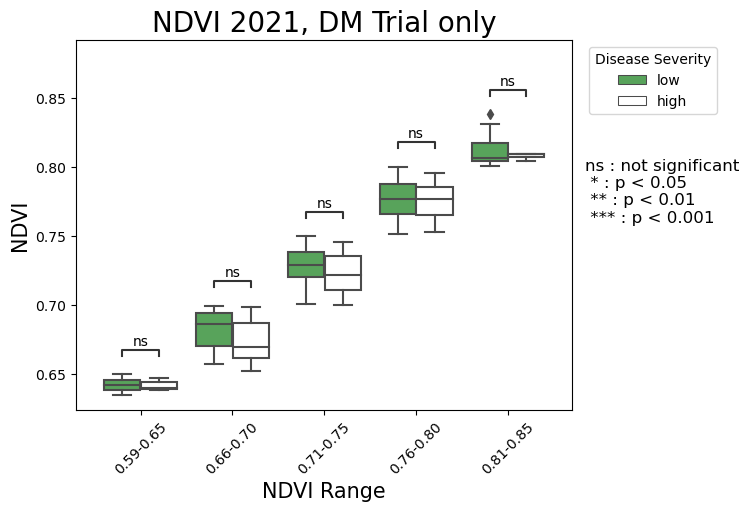

In [22]:
x = "ndvi_group"
y = "ndvi"
hue = "severity_class"
hue_order=['low', 'high']
order = ['0.59-0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low")),
    ((order[4], "high"), (order[4], "low"))
    ]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=dm_only, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.59-0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85'], 
                   rotation=45)
add_stat_annotation(ax, data=dm_only, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=15)
plt.ylabel("NDVI", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("NDVI 2021, DM Trial only", fontsize=20)


# 2020

<AxesSubplot: xlabel='ndvi', ylabel='Count'>

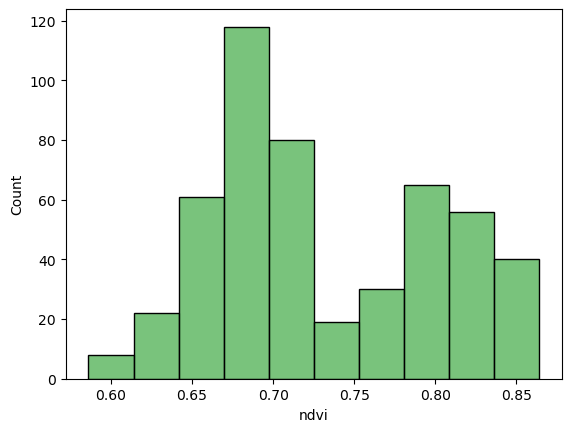

In [23]:
sns.histplot(data=data_20, x='ndvi')

In [24]:
print(data_20.ndvi.min())
print(data_20.ndvi.max())


0.5860756051128639
0.8642208740691624


In [25]:
data_20['ndvi_group'] = ''

data_20.loc[data_20['ndvi']<=0.65,'ndvi_group']= '0.58-0.65'
               
data_20.loc[(data_20['ndvi']> 0.65)&(data_20['ndvi']<=0.7),'ndvi_group']='0.66-0.70'

data_20.loc[(data_20['ndvi']> 0.7)&(data_20['ndvi']<=0.75),'ndvi_group']='0.71-0.75'
data_20.loc[(data_20['ndvi']> 0.75)&(data_20['ndvi']<=0.8),'ndvi_group']='0.76-0.80'
data_20.loc[(data_20['ndvi']> 0.8)&(data_20['ndvi']<=0.87),'ndvi_group']='0.81-0.87'

In [26]:
data_20['severity_class'] = 'low'

data_20.loc[data_20['DM_severity']>10,'severity_class']= 'high'

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.76-0.80_low v.s. 0.76-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.931e-02 U_stat=5.410e+02
0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.960e-01 U_stat=1.600e+01
0.81-0.87_low v.s. 0.81-0.87_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.525e-04 U_stat=1.224e+03


Text(0.5, 1.0, 'EVI 2020, All Rows')

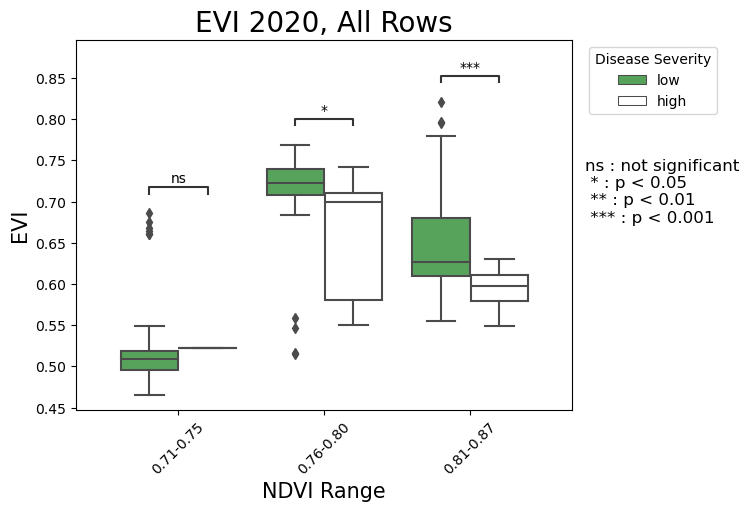

In [27]:
x = "ndvi_group"
y = "evi"
hue = "severity_class"
hue_order=['low', 'high']
order = ['0.71-0.75','0.76-0.80','0.81-0.87']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low"))
    ]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_20, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.71-0.75','0.76-0.80','0.81-0.87'], 
                   rotation=45)
add_stat_annotation(ax, data=data_20, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=15)
plt.ylabel("EVI", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("EVI 2020, All Rows", fontsize=20)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.76-0.80_low v.s. 0.76-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.006e-02 U_stat=5.650e+02
0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=6.300e+01
0.81-0.87_low v.s. 0.81-0.87_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.123e-04 U_stat=1.229e+03


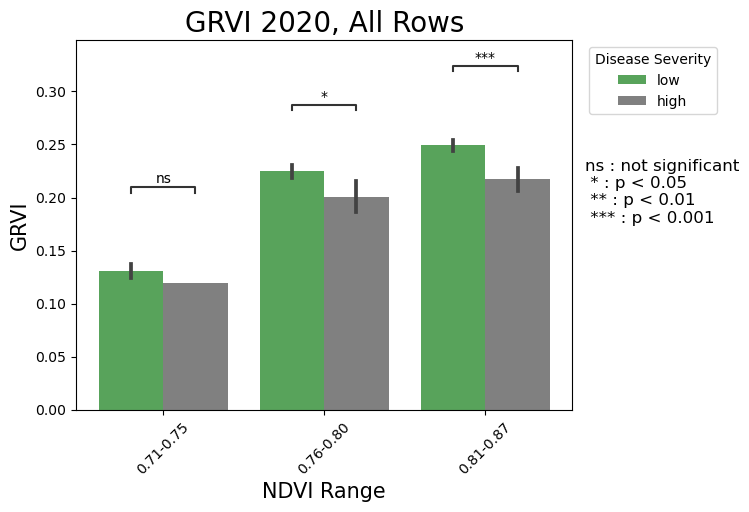

In [33]:
x = "ndvi_group"
y = "grvi"
hue = "severity_class"
hue_order=['low', 'high']
order = ['0.71-0.75','0.76-0.80','0.81-0.87']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low"))
    ]

colors = ["#4CAF50", "#808080"]
sns.set_palette(sns.color_palette(colors))

ax = sns.barplot(data=data_20, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.71-0.75','0.76-0.80','0.81-0.87'], 
                   rotation=45)
add_stat_annotation(ax, data=data_20, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=15)
plt.ylabel("GRVI", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("GRVI 2020, All Rows", fontsize=20)
#plt.savefig('grvi_by_ndvi_20.jpeg', transparent=True, bbox_inches='tight')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.76-0.80_low v.s. 0.76-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.037e-02 U_stat=9.230e+02
0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.514e-04 U_stat=1.300e+01


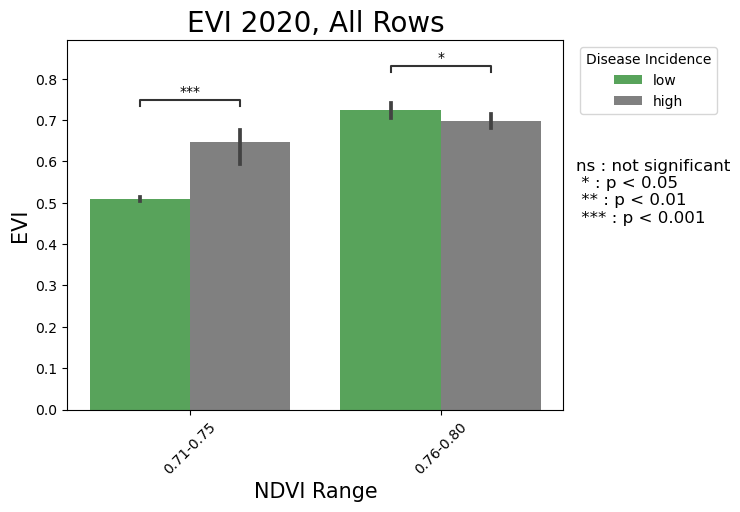

In [87]:
x = "ndvi_group"
y = "evi"
hue = "inc_class"
hue_order=['low', 'high']
order = ['0.71-0.75','0.76-0.80']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low"))
    ]

colors = ["#4CAF50", "#808080"]
sns.set_palette(sns.color_palette(colors))

ax = sns.barplot(data=data_20, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.71-0.75','0.76-0.80'], 
                   rotation=45)
add_stat_annotation(ax, data=data_20, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=15)
plt.ylabel("EVI", fontsize= 15)
plt.legend(title='Disease Incidence',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("EVI 2020, All Rows", fontsize=20)
plt.savefig('evi_ndvi_inc_20.jpeg', transparent=True, bbox_inches='tight')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2020-08-06_low v.s. 2020-08-06_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.299e-04 U_stat=1.756e+03
2020-07-09_low v.s. 2020-07-09_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.773e-02 U_stat=2.150e+01
2020-08-13_low v.s. 2020-08-13_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.884e-02 U_stat=1.618e+03


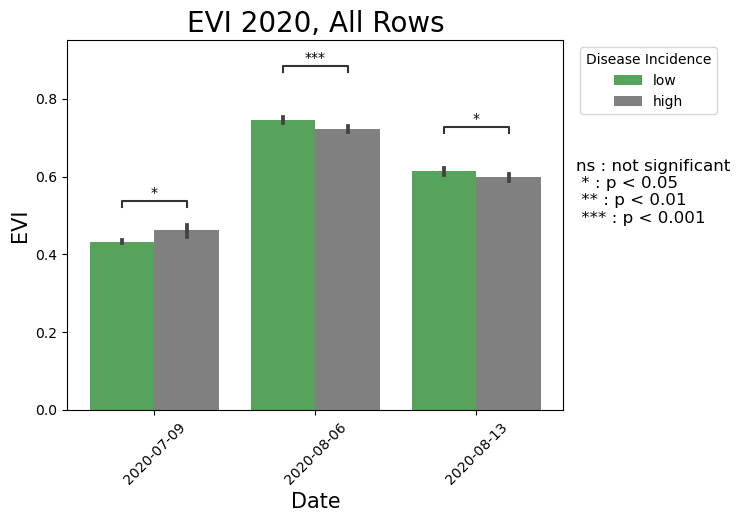

In [91]:
x = "Date"
y = "evi"
hue = "inc_class"
hue_order=['low', 'high']
order = ['2020-07-09', '2020-08-06',
       '2020-08-13']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ]

colors = ["#4CAF50", "#808080"]
sns.set_palette(sns.color_palette(colors))

ax = sns.barplot(data=data_20, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['2020-07-09', '2020-08-06',
       '2020-08-13'], 
                   rotation=45)
add_stat_annotation(ax, data=data_20, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=15)
plt.ylabel("EVI", fontsize= 15)
plt.legend(title='Disease Incidence',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("EVI 2020, All Rows", fontsize=20)
plt.savefig('evi_ndvi_inc_20_date.jpeg', transparent=True, bbox_inches='tight')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2020-08-13_low v.s. 2020-08-13_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.625e-04 U_stat=1.209e+03
2020-08-06_low v.s. 2020-08-06_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.208e-01 U_stat=4.650e+02


Text(0.5, 1.0, 'EVI 2020, All Rows')

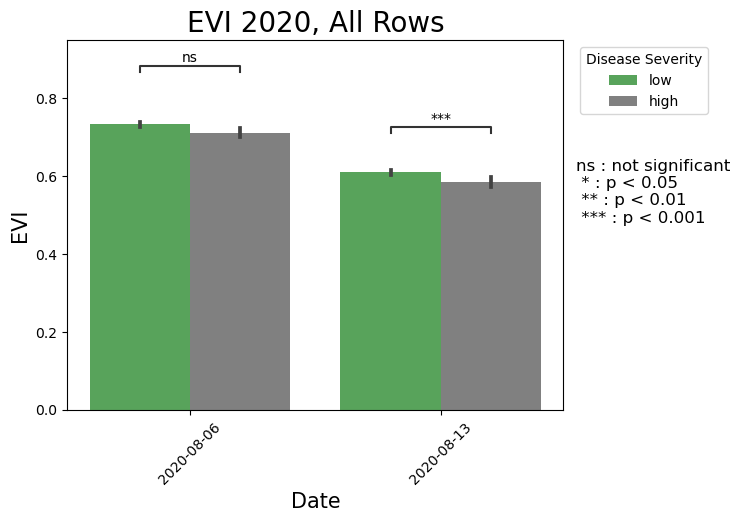

In [94]:
x = "Date"
y = "evi"
hue = "severity_class"
hue_order=['low', 'high']
order = ['2020-08-06',
       '2020-08-13']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low"))
    ]

colors = ["#4CAF50", "#808080"]
sns.set_palette(sns.color_palette(colors))

ax = sns.barplot(data=data_20, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['2020-08-06',
       '2020-08-13'], 
                   rotation=45)
add_stat_annotation(ax, data=data_20, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=15)
plt.ylabel("EVI", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("EVI 2020, All Rows", fontsize=20)
plt.savefig('evi_ndvi_sev_20_date.jpeg', transparent=True, bbox_inches='tight')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.611e-14 U_stat=2.605e+04
0.66-0.70_low v.s. 0.66-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.216e-01 U_stat=1.892e+03
0.76-0.80_low v.s. 0.76-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.774e-57 U_stat=6.496e+04
0.81-0.85_low v.s. 0.81-0.85_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.890e-11 U_stat=1.299e+03


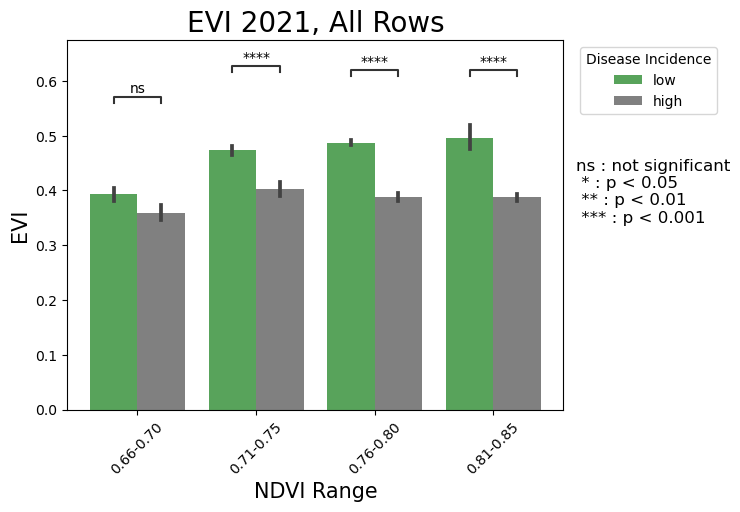

In [106]:
x = "ndvi_group"
y = "evi"
hue = "inc_class"
hue_order=['low', 'high']
order = ['0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low"))
    ]

colors = ["#4CAF50", "#808080"]
sns.set_palette(sns.color_palette(colors))

ax = sns.barplot(data=data_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.66-0.70','0.71-0.75','0.76-0.80', '0.81-0.85'], 
                   rotation=45)
add_stat_annotation(ax, data=data_21, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=15)
plt.ylabel("EVI", fontsize= 15)
plt.legend(title='Disease Incidence',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("EVI 2021, All Rows", fontsize=20)
#plt.savefig('evi_ndvi_inc_21.jpeg', transparent=True, bbox_inches='tight')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2021-08-03_low v.s. 2021-08-03_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.808e-02 U_stat=3.475e+03
2021-07-27_low v.s. 2021-07-27_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.795e+03
2021-08-10_low v.s. 2021-08-10_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.435e-01 U_stat=4.153e+03
2021-08-17_low v.s. 2021-08-17_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.077e+03


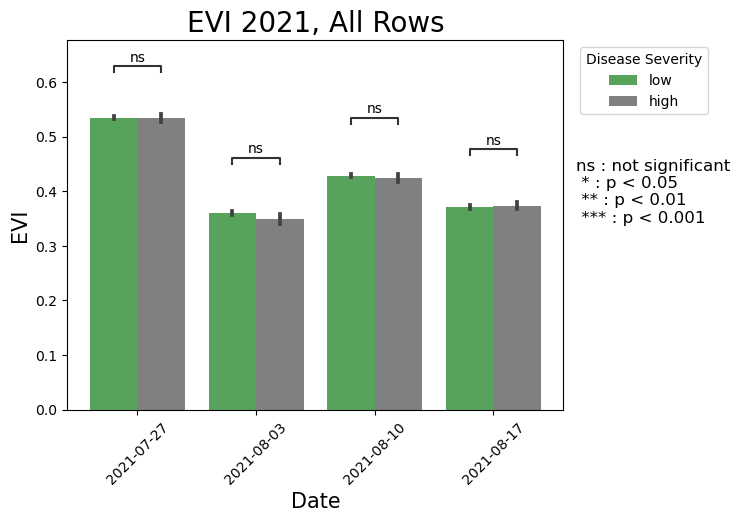

In [113]:
x = "Date"
y = "evi"
hue = "severity_class"
hue_order=['low', 'high']
order = ['2021-07-27', '2021-08-03','2021-08-10',
       '2021-08-17']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low"))
    ]

colors = ["#4CAF50", "#808080"]
sns.set_palette(sns.color_palette(colors))

ax = sns.barplot(data=data_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['2021-07-27', '2021-08-03','2021-08-10',
       '2021-08-17'], 
                   rotation=45)
add_stat_annotation(ax, data=data_21, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=15)
plt.ylabel("EVI", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("EVI 2021, All Rows", fontsize=20)
plt.savefig('evi_date_sev_21.jpeg', transparent=True, bbox_inches='tight')

In [107]:
data_21.Date.unique()

array(['2021-07-07', '2021-07-27', '2021-08-03', '2021-08-10',
       '2021-08-17'], dtype=object)

<AxesSubplot: xlabel='ndvi', ylabel='Count'>

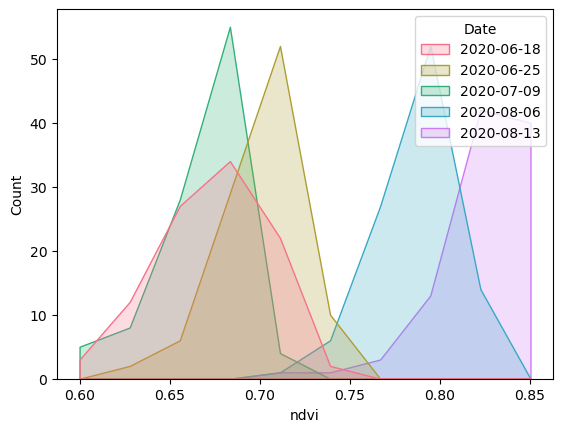

In [96]:
sns.histplot(data_20, x="ndvi", hue="Date", element="poly")


<AxesSubplot: xlabel='ndvi', ylabel='Count'>

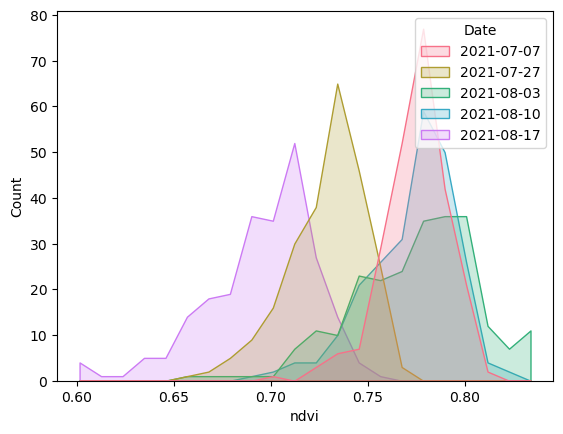

In [97]:
sns.histplot(data_21, x="ndvi", hue="Date", element="poly")


In [42]:
data_20.columns

Index(['acquired', 'plot', 'blue', 'green', 'red', 'nir', 'row', 'panel',
       'Date', 'Treatment', 'Block', 'PM_severity', 'DM_severity', 'total_dis',
       'geometry', 'centroid', 'PM_inc', 'DM_inc', 'ndvi', 'evi', 'savi',
       'arvi', 'grvi', 'bgvi', 'gcc', 'gri', 'inc_class', 'severity_class',
       'ndvi_group'],
      dtype='object')

In [68]:
data_20_dm.inc_class.unique()

array(['low'], dtype=object)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2020-08-06_low v.s. 2020-08-06_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.439e-03 U_stat=1.718e+03
2020-07-09_low v.s. 2020-07-09_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.225e-02 U_stat=2.350e+01
2020-08-13_low v.s. 2020-08-13_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.145e-02 U_stat=1.642e+03


Text(0.5, 1.0, 'SAVI 2020, All Rows')

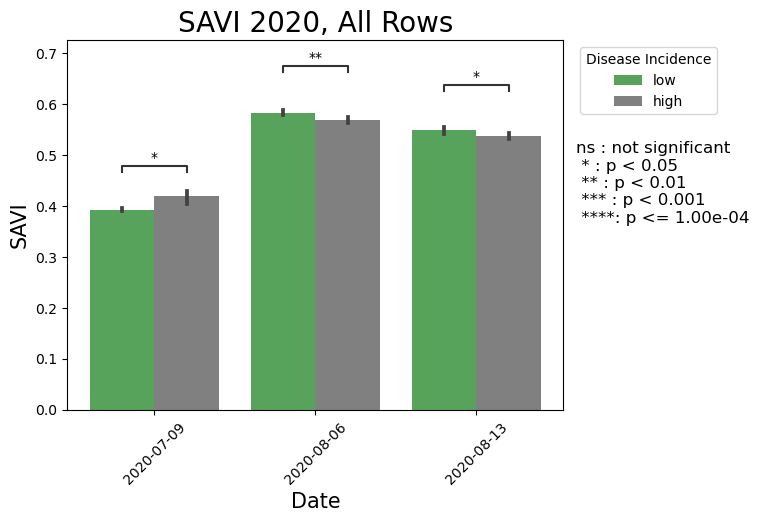

In [82]:
x = "Date"
y = "savi"
hue = "inc_class"
hue_order=['low', 'high']
order = [
    #'2020-06-18', 
         #'2020-06-25', 
         '2020-07-09', 
         '2020-08-06',
       '2020-08-13'
]
pairs=[
    ((order[0], "low"), (order[0], "high")),
    ((order[1], "low"), (order[1], "high")),
    ((order[2], "low"), (order[2], "high"))
    ]

colors = ["#4CAF50", "#808080"]
sns.set_palette(sns.color_palette(colors))

ax = sns.barplot(data=data_20, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = [
    #'2020-06-18', 
                             #'2020-06-25', 
                             '2020-07-09',
                             '2020-08-06',
                             '2020-08-13'
                            ], 
                   rotation=45)
add_stat_annotation(ax, data=data_20, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=15)
plt.ylabel("SAVI", fontsize= 15)
plt.legend(title='Disease Incidence',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', fontsize=12)
plt.title("SAVI 2020, All Rows", fontsize=20)
#plt.savefig('savi_ndvi_date_20.jpeg', transparent=True, bbox_inches='tight')

In [51]:
data_21.Date.unique()

array(['2021-07-07', '2021-07-27', '2021-08-03', '2021-08-10',
       '2021-08-17'], dtype=object)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04



ValueError: box_pairs contains an invalid box pair.

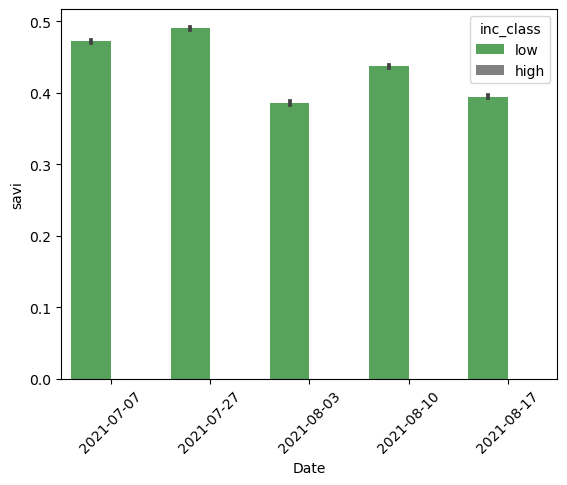

In [52]:
x = "Date"
y = "savi"
hue = "inc_class"
hue_order=['low', 'high']
order = ['2021-07-07', '2021-07-27', '2021-08-03', '2021-08-10',
       '2021-08-17']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low")),
    ((order[4], "high"), (order[4], "low"))
    ]

colors = ["#4CAF50", "#808080"]
sns.set_palette(sns.color_palette(colors))

ax = sns.barplot(data=data_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['2021-07-07', '2021-07-27', '2021-08-03', '2021-08-10',
       '2021-08-17'], 
                   rotation=45)
add_stat_annotation(ax, data=data_21, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=15)
plt.ylabel("SAVI", fontsize= 15)
plt.legend(title='Disease Incidence',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', fontsize=12)
plt.title("SAVI 2021, All Rows", fontsize=20)
#plt.savefig('savi_ndvi_date_20.jpeg', transparent=True, bbox_inches='tight')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2020-08-13_low v.s. 2020-08-13_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.636e-04 U_stat=1.217e+03
2020-08-06_low v.s. 2020-08-06_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.784e-02 U_stat=4.830e+02


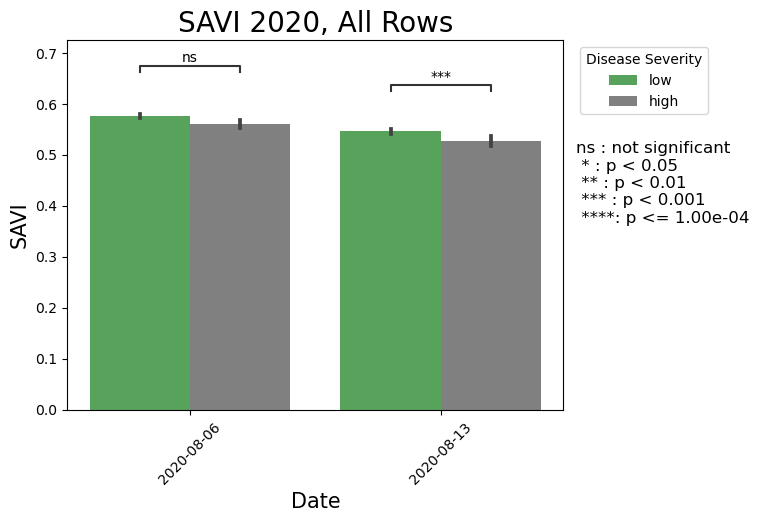

In [49]:
x = "Date"
y = "savi"
hue = "severity_class"
hue_order=['low', 'high']
order = ['2020-08-06',
       '2020-08-13']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low"))
    ]

colors = ["#4CAF50", "#808080"]
sns.set_palette(sns.color_palette(colors))

ax = sns.barplot(data=data_20, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['2020-08-06','2020-08-13'], 
                   rotation=45)
add_stat_annotation(ax, data=data_20, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=15)
plt.ylabel("SAVI", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', fontsize=12)
plt.title("SAVI 2020, All Rows", fontsize=20)
plt.savefig('savi_ndvi_date_20.jpeg', transparent=True, bbox_inches='tight')

In [34]:
data_20_dm = data_20[data_20['Block']=='DM']
data_20_dm.Block.unique()

array(['DM'], dtype=object)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.76-0.80_low v.s. 0.76-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.931e-02 U_stat=5.410e+02
0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.960e-01 U_stat=1.600e+01
0.81-0.87_low v.s. 0.81-0.87_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.525e-04 U_stat=1.224e+03


Text(0.5, 1.0, 'EVI 2020, GDM Trial')

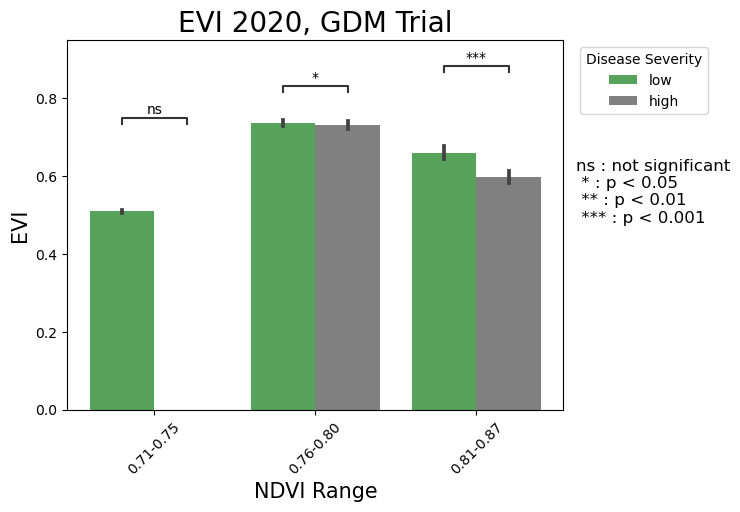

In [37]:
x = "ndvi_group"
y = "evi"
hue = "severity_class"
hue_order=['low', 'high']
order = ['0.71-0.75','0.76-0.80','0.81-0.87']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low"))
    ]

colors = ["#4CAF50", "#808080"]
sns.set_palette(sns.color_palette(colors))

ax = sns.barplot(data=data_20_dm, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.71-0.75','0.76-0.80','0.81-0.87'], 
                   rotation=45)
add_stat_annotation(ax, data=data_20, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=15)
plt.ylabel("EVI", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("EVI 2020, GDM Trial", fontsize=20)
#plt.savefig('grvi_by_ndvi_20.jpeg', transparent=True, bbox_inches='tight')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.76-0.80_low v.s. 0.76-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.157e-02 U_stat=5.620e+02
0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=6.100e+01
0.81-0.87_low v.s. 0.81-0.87_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.781e-04 U_stat=1.234e+03


Text(0.5, 1.0, 'ARVI 2020, All Rows')

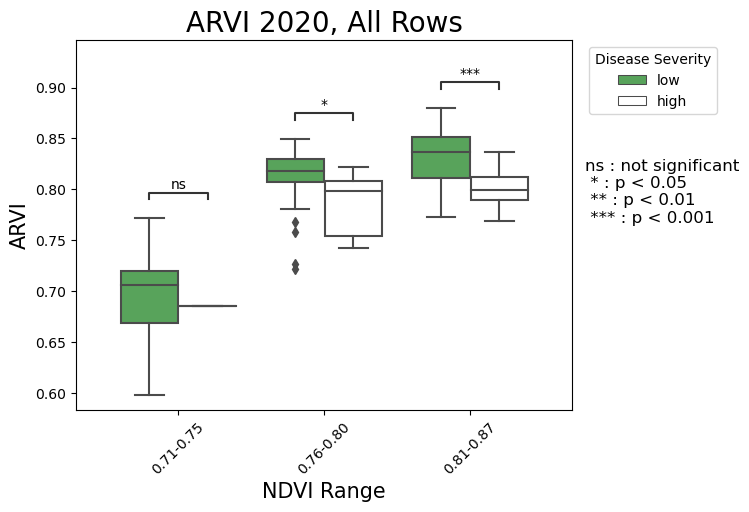

In [33]:
x = "ndvi_group"
y = "arvi"
hue = "severity_class"
hue_order=['low', 'high']
order = ['0.71-0.75','0.76-0.80','0.81-0.87']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low"))
    ]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_20, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.71-0.75','0.76-0.80','0.81-0.87'], 
                   rotation=45)
add_stat_annotation(ax, data=data_20, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=15)
plt.ylabel("ARVI", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("ARVI 2020, All Rows", fontsize=20)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.76-0.80_low v.s. 0.76-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.329e-02 U_stat=5.590e+02
0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.871e-01 U_stat=1.400e+01
0.81-0.87_low v.s. 0.81-0.87_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.720e-04 U_stat=1.235e+03


Text(0.5, 1.0, 'SAVI 2020, All Rows')

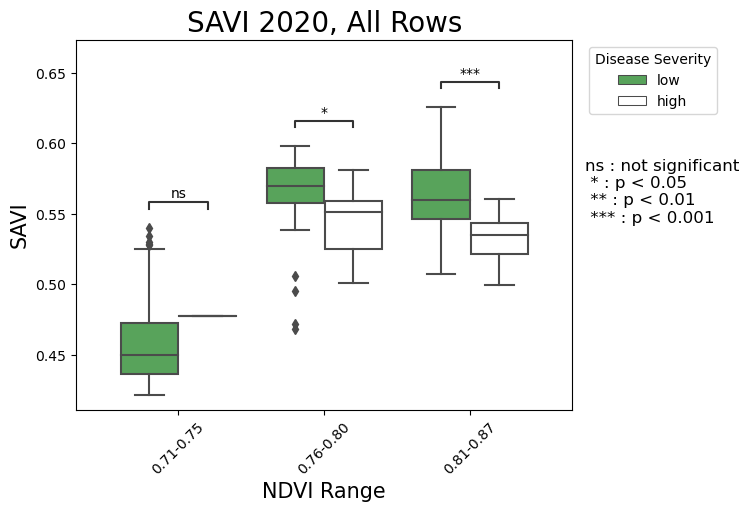

In [34]:
x = "ndvi_group"
y = "savi"
hue = "severity_class"
hue_order=['low', 'high']
order = ['0.71-0.75','0.76-0.80','0.81-0.87']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low"))
    ]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_20, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.71-0.75','0.76-0.80','0.81-0.87'], 
                   rotation=45)
add_stat_annotation(ax, data=data_20, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=15)
plt.ylabel("SAVI", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("SAVI 2020, All Rows", fontsize=20)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.76-0.80_low v.s. 0.76-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.006e-02 U_stat=5.650e+02
0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=6.300e+01
0.81-0.87_low v.s. 0.81-0.87_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.123e-04 U_stat=1.229e+03


Text(0.5, 1.0, 'GRI 2020, All Rows')

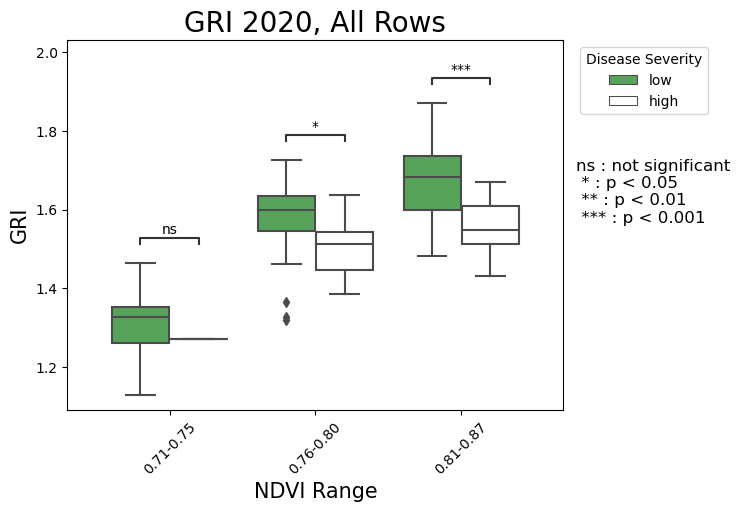

In [35]:
x = "ndvi_group"
y = "gri"
hue = "severity_class"
hue_order=['low', 'high']
order = ['0.71-0.75','0.76-0.80','0.81-0.87']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low"))
    ]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_20, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.71-0.75','0.76-0.80','0.81-0.87'], 
                   rotation=45)
add_stat_annotation(ax, data=data_20, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=15)
plt.ylabel("GRI", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("GRI 2020, All Rows", fontsize=20)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.76-0.80_low v.s. 0.76-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.380e+02
0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.900e+01
0.81-0.87_low v.s. 0.81-0.87_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.244e-01 U_stat=8.820e+02


Text(0.5, 1.0, 'GCC 2020, All Rows')

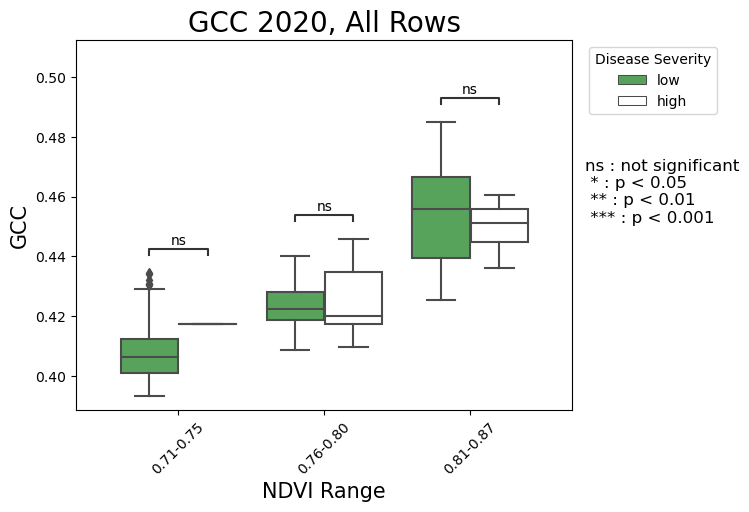

In [36]:
x = "ndvi_group"
y = "gcc"
hue = "severity_class"
hue_order=['low', 'high']
order = ['0.71-0.75','0.76-0.80','0.81-0.87']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low"))
    ]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_20, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.71-0.75','0.76-0.80','0.81-0.87'], 
                   rotation=45)
add_stat_annotation(ax, data=data_20, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=15)
plt.ylabel("GCC", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("GCC 2020, All Rows", fontsize=20)


<AxesSubplot: xlabel='ndvi', ylabel='Count'>

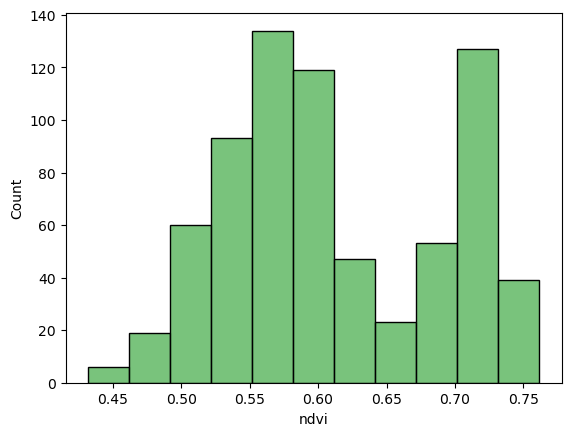

In [37]:
# Check NDVI distribution

sns.histplot(data=data_22, x='ndvi')

In [38]:
print(data_22.ndvi.min())
print(data_22.ndvi.max())


0.4322047894302232
0.7616759464063256


In [39]:
data_22['ndvi_group'] = ''

data_22.loc[data_22['ndvi']<=0.5,'ndvi_group']= '0.43-0.50'
               
data_22.loc[(data_22['ndvi']> 0.5)&(data_22['ndvi']<=0.55),'ndvi_group']='0.51-0.55'

data_22.loc[(data_22['ndvi']> 0.55)&(data_22['ndvi']<=0.60),'ndvi_group']='0.56-0.60'
data_22.loc[(data_22['ndvi']> 0.60)&(data_22['ndvi']<=0.65),'ndvi_group']='0.61-0.65'
data_22.loc[(data_22['ndvi']> 0.65)&(data_22['ndvi']<=0.70),'ndvi_group']='0.66-0.70'
data_22.loc[(data_22['ndvi']> 0.7)&(data_22['ndvi']<=0.77),'ndvi_group']='0.70-0.77'


In [40]:
data_22['severity_class'] = 'low'

data_22.loc[data_22['DM_severity']>10,'severity_class']= 'high'

In [41]:
data_22.ndvi_group.unique()

array(['0.61-0.65', '0.56-0.60', '0.51-0.55', '0.43-0.50', '0.66-0.70',
       '0.70-0.77'], dtype=object)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.61-0.65_low v.s. 0.61-0.65_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.414e-01 U_stat=1.080e+02
0.56-0.60_low v.s. 0.56-0.60_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.680e+02
0.66-0.70_low v.s. 0.66-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.100e+01
0.70-0.77_low v.s. 0.70-0.77_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.730e+02


Text(0.5, 1.0, 'EVI 2022, All Rows')

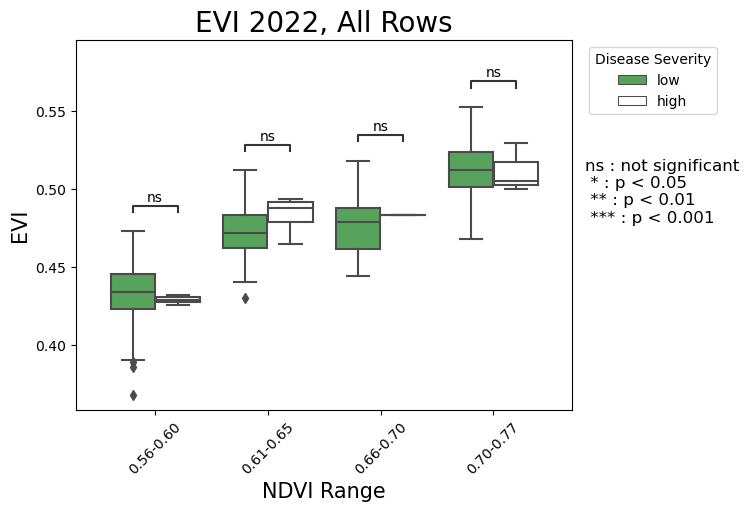

In [42]:
x = "ndvi_group"
y = "evi"
hue = "severity_class"
hue_order=['low', 'high']
order = ['0.56-0.60', '0.61-0.65', '0.66-0.70',
       '0.70-0.77']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low"))
    ]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_22, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.56-0.60', '0.61-0.65', '0.66-0.70',
       '0.70-0.77'], 
                   rotation=45)
add_stat_annotation(ax, data=data_22, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=15)
plt.ylabel("EVI", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("EVI 2022, All Rows", fontsize=20)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.61-0.65_low v.s. 0.61-0.65_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.230e+02
0.56-0.60_low v.s. 0.56-0.60_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.938e-01 U_stat=3.590e+02
0.66-0.70_low v.s. 0.66-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.623e-01 U_stat=1.000e+00
0.70-0.77_low v.s. 0.70-0.77_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.400e+02


Text(0.5, 1.0, 'ARVI 2022, All Rows')

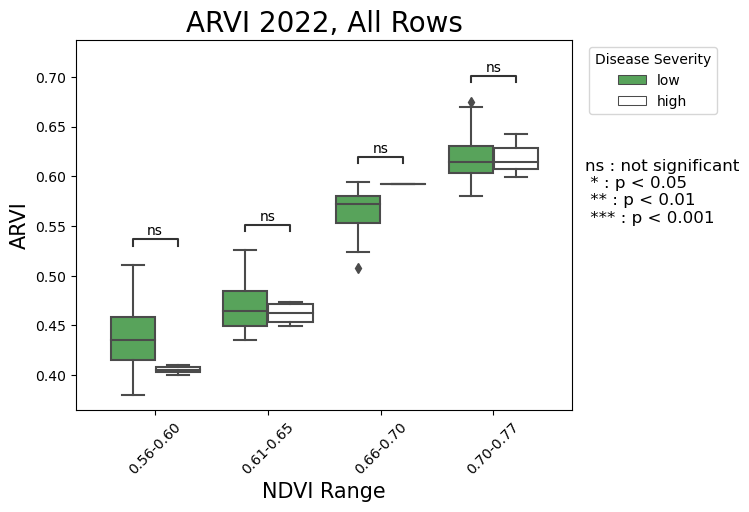

In [43]:
x = "ndvi_group"
y = "arvi"
hue = "severity_class"
hue_order=['low', 'high']
order = ['0.56-0.60', '0.61-0.65', '0.66-0.70',
       '0.70-0.77']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low"))
    ]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_22, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.56-0.60', '0.61-0.65', '0.66-0.70',
       '0.70-0.77'], 
                   rotation=45)
add_stat_annotation(ax, data=data_22, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=15)
plt.ylabel("ARVI", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("ARVI 2022, All Rows", fontsize=20)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.61-0.65_low v.s. 0.61-0.65_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.322e-01 U_stat=1.170e+02
0.56-0.60_low v.s. 0.56-0.60_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.680e+02
0.66-0.70_low v.s. 0.66-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.700e+01
0.70-0.77_low v.s. 0.70-0.77_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.810e+02


Text(0.5, 1.0, 'SAVI 2022, All Rows')

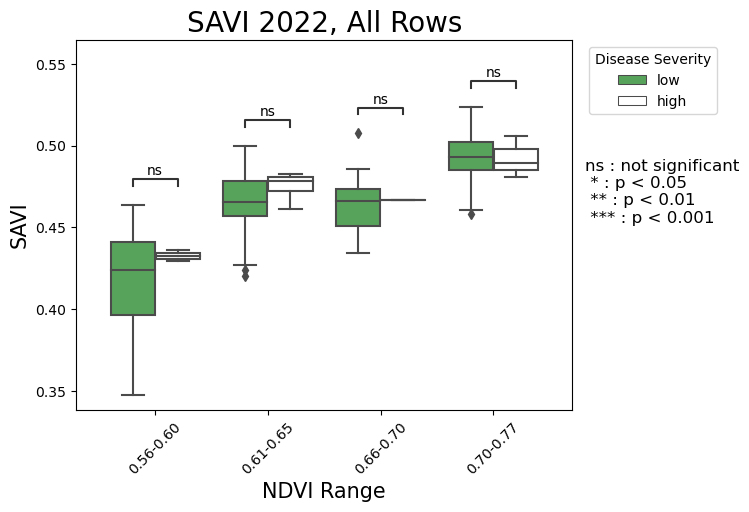

In [44]:
x = "ndvi_group"
y = "savi"
hue = "severity_class"
hue_order=['low', 'high']
order = ['0.56-0.60', '0.61-0.65', '0.66-0.70',
       '0.70-0.77']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low"))
    ]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_22, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.56-0.60', '0.61-0.65', '0.66-0.70',
       '0.70-0.77'], 
                   rotation=45)
add_stat_annotation(ax, data=data_22, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=15)
plt.ylabel("SAVI", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("SAVI 2022, All Rows", fontsize=20)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.61-0.65_low v.s. 0.61-0.65_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.644e-01 U_stat=2.660e+02
0.56-0.60_low v.s. 0.56-0.60_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.776e-01 U_stat=3.810e+02
0.66-0.70_low v.s. 0.66-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.400e+01
0.70-0.77_low v.s. 0.70-0.77_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.670e+02


Text(0.5, 1.0, 'GRI 2022, All Rows')

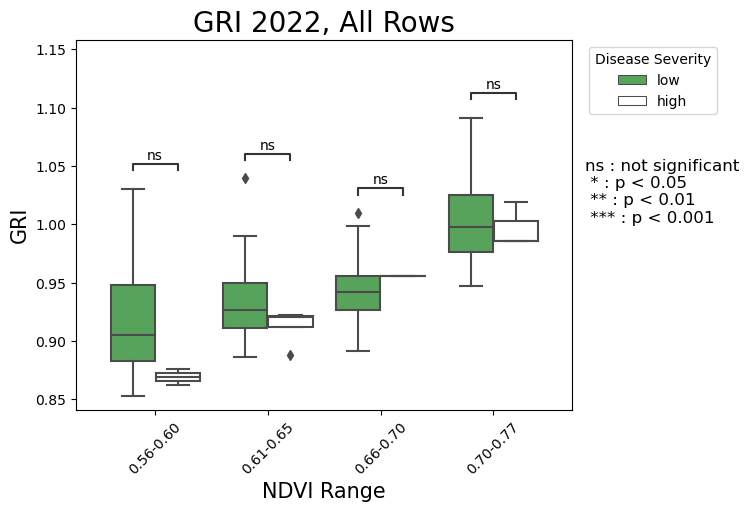

In [45]:
x = "ndvi_group"
y = "gri"
hue = "severity_class"
hue_order=['low', 'high']
order = ['0.56-0.60', '0.61-0.65', '0.66-0.70',
       '0.70-0.77']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low"))
    ]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_22, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.56-0.60', '0.61-0.65', '0.66-0.70',
       '0.70-0.77'], 
                   rotation=45)
add_stat_annotation(ax, data=data_22, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=15)
plt.ylabel("GRI", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("GRI 2022, All Rows", fontsize=20)


In [46]:
dm_only_22 = data_22.loc[data_22['Block']=='DM']
dm_only_22.Block.unique()

array(['DM'], dtype=object)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04



/Users/kathleenkanaley/miniconda3/envs/planetenv/lib/python3.10/site-packages/statannot/statannot.py:555: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif text_format is 'star':
/Users/kathleenkanaley/miniconda3/envs/planetenv/lib/python3.10/site-packages/statannot/statannot.py:557: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif text_format is 'simple':
/Users/kathleenkanaley/miniconda3/envs/planetenv/lib/python3.10/site-packages/statannot/statannot.py:555: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif text_format is 'star':
/Users/kathleenkanaley/miniconda3/envs/planetenv/lib/python3.10/site-packages/statannot/statannot.py:557: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif text_format is 'simple':
/Users/kathleenkanaley/miniconda3/envs/planetenv/lib/python3.10/site-packages/statannot/statannot.py:555: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif text_format is 'star':
/Users/kathleenkanaley/miniconda3/envs/pl

ValueError: `x` and `y` must be of nonzero size.

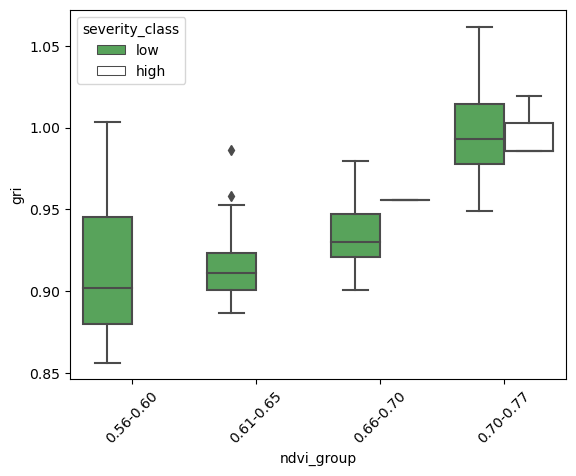

In [47]:
# x = "ndvi_group"
# y = "gri"
# hue = "severity_class"
# hue_order=['low', 'high']
# order = ['0.56-0.60', '0.61-0.65', '0.66-0.70',
#        '0.70-0.77']
# pairs=[
#     ((order[0], "high"), (order[0], "low")),
#     ((order[1], "high"), (order[1], "low")),
#     ((order[2], "high"), (order[2], "low")),
#     ((order[3], "high"), (order[3], "low"))
#     ]

# colors = ["#4CAF50", "#FFFFFF"]
# sns.set_palette(sns.color_palette(colors))

# ax = sns.boxplot(data=dm_only_22, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
# ax.set_xticklabels(labels = ['0.56-0.60', '0.61-0.65', '0.66-0.70',
#        '0.70-0.77'], 
#                    rotation=45)
# add_stat_annotation(ax, data=dm_only_22, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
#                     test='Mann-Whitney', loc='inside', verbose=2)


# plt.xlabel("NDVI Range", fontsize=15)
# plt.ylabel("GRI", fontsize= 15)
# plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
# plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
# plt.title("GRI 2022, DM Only", fontsize=20)


# 2021 by incidence

In [62]:
data_21['inc_class'] = 'low'

data_21.loc[data_21['DM_inc']>25,'inc_class']= 'high'

data_20['inc_class'] = 'low'

data_20.loc[data_20['DM_inc']>25,'inc_class']= 'high'

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.66-0.70_low v.s. 0.66-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.020e-01 U_stat=1.892e+03
0.59-0.65_low v.s. 0.59-0.65_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.049e-02 U_stat=4.000e+00
0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.076e-13 U_stat=2.605e+04
0.76-0.80_low v.s. 0.76-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.097e-56 U_stat=6.496e+04
0.81-0.85_low v.s. 0.81-0.85_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.362e-11 U_stat=1.299e+03


Text(0.5, 1.0, 'EVI 2021, All Rows')

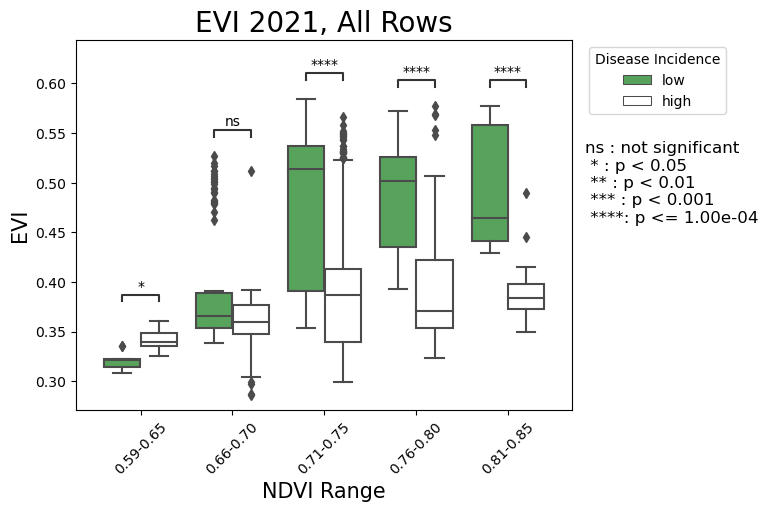

In [63]:
x = "ndvi_group"
y = "evi"
hue = "inc_class"
hue_order=['low', 'high']
order = ['0.59-0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low")),
    ((order[4], "high"), (order[4], "low"))
    ]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.59-0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85'], 
                   rotation=45)
add_stat_annotation(ax, data=data_21, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=15)
plt.ylabel("EVI", fontsize= 15)
plt.legend(title='Disease Incidence',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', fontsize=12)
plt.title("EVI 2021, All Rows", fontsize=20)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.66-0.70_low v.s. 0.66-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.020e-01 U_stat=1.892e+03
0.59-0.65_low v.s. 0.59-0.65_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.049e-02 U_stat=4.000e+00
0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.076e-13 U_stat=2.605e+04
0.76-0.80_low v.s. 0.76-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.097e-56 U_stat=6.496e+04
0.81-0.85_low v.s. 0.81-0.85_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.362e-11 U_stat=1.299e+03


Text(0.5, 1.0, 'EVI 2021, All Rows')

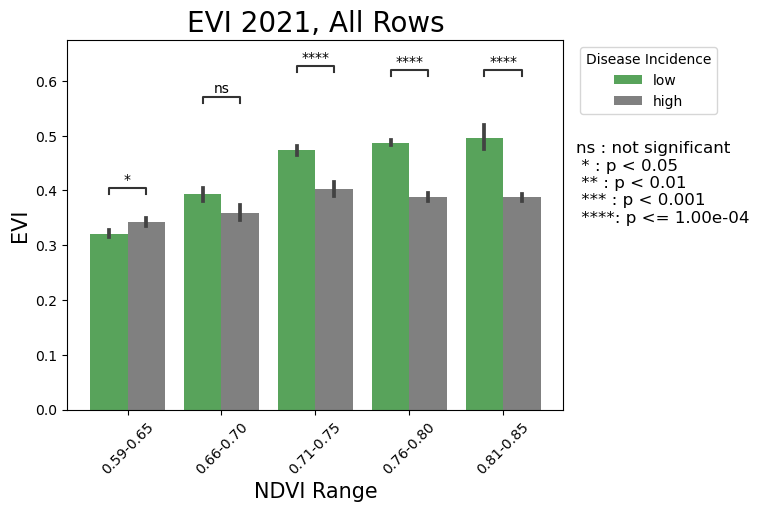

In [64]:
x = "ndvi_group"
y = "evi"
hue = "inc_class"
hue_order=['low', 'high']
order = ['0.59-0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low")),
    ((order[4], "high"), (order[4], "low"))
    ]

colors = ["#4CAF50", "#808080"]
sns.set_palette(sns.color_palette(colors))

ax = sns.barplot(data=data_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.59-0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85'], 
                   rotation=45)
add_stat_annotation(ax, data=data_21, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=15)
plt.ylabel("EVI", fontsize= 15)
plt.legend(title='Disease Incidence',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', fontsize=12)
plt.title("EVI 2021, All Rows", fontsize=20)
#plt.savefig('evi_by_ndvi.jpeg', transparent=True, bbox_inches='tight')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.66-0.70_low v.s. 0.66-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.378e-01 U_stat=1.204e+03
0.59-0.65_low v.s. 0.59-0.65_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.746e-01 U_stat=1.300e+01
0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.662e-01 U_stat=1.118e+04
0.76-0.80_low v.s. 0.76-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.058e-06 U_stat=1.583e+04
0.81-0.85_low v.s. 0.81-0.85_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.390e-01 U_stat=1.710e+02


Text(0.5, 1.0, 'EVI 2021, All Rows')

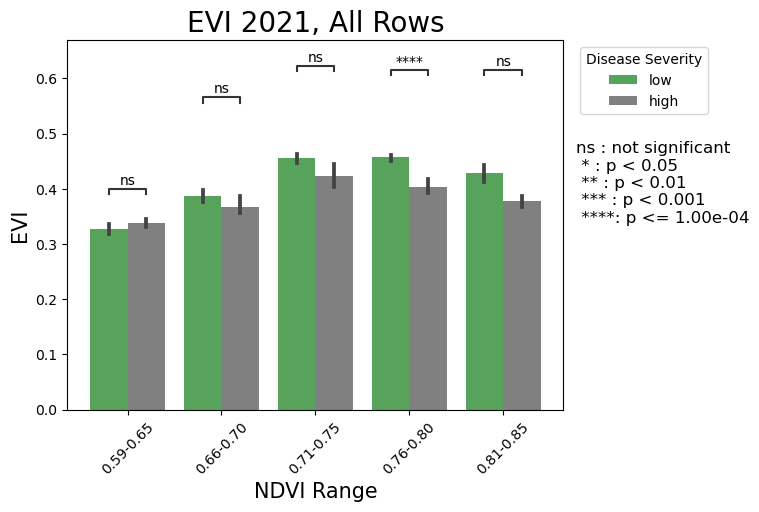

In [65]:
x = "ndvi_group"
y = "evi"
hue = "severity_class"
hue_order=['low', 'high']
order = ['0.59-0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low")),
    ((order[4], "high"), (order[4], "low"))
    ]

colors = ["#4CAF50", "#808080"]
sns.set_palette(sns.color_palette(colors))

ax = sns.barplot(data=data_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.59-0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85'], 
                   rotation=45)
add_stat_annotation(ax, data=data_21, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=15)
plt.ylabel("EVI", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', fontsize=12)
plt.title("EVI 2021, All Rows", fontsize=20)
#plt.savefig('evi_by_ndvi.jpeg', transparent=True, bbox_inches='tight')

In [51]:
data_21.Date.unique()

array(['2021-07-07', '2021-07-27', '2021-08-03', '2021-08-10',
       '2021-08-17'], dtype=object)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2021-07-27_low v.s. 2021-07-27_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.991e+03
2021-07-07_low v.s. 2021-07-07_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.530e+02
2021-08-10_low v.s. 2021-08-10_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.386e-01 U_stat=4.523e+03
2021-08-17_low v.s. 2021-08-17_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.569e-02 U_stat=4.385e+03


Text(0.5, 1.0, 'EVI 2021, All Rows')

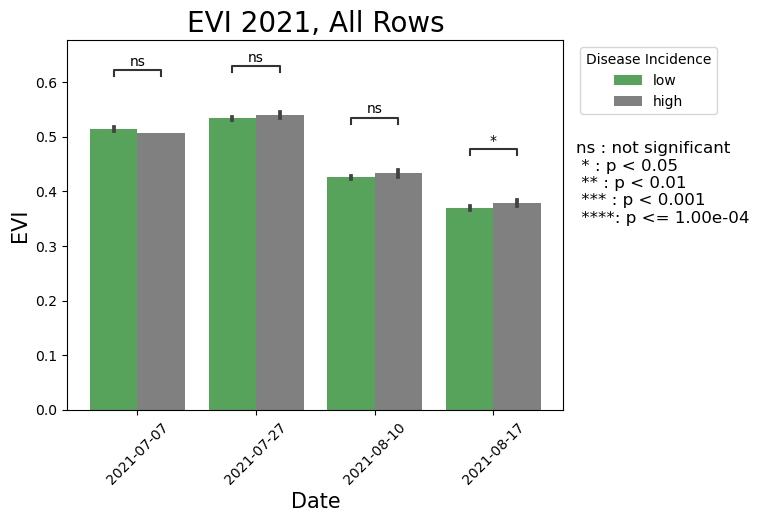

In [53]:
x = "Date"
y = "evi"
hue = "inc_class"
hue_order=['low', 'high']
order = ['2021-07-07', '2021-07-27', '2021-08-10',
       '2021-08-17']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low"))
    ]

colors = ["#4CAF50", "#808080"]
sns.set_palette(sns.color_palette(colors))

ax = sns.barplot(data=data_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['2021-07-07','2021-07-27', '2021-08-10','2021-08-17'], 
                   rotation=45)
add_stat_annotation(ax, data=data_21, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=15)
plt.ylabel("EVI", fontsize= 15)
plt.legend(title='Disease Incidence',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', fontsize=12)
plt.title("EVI 2021, All Rows", fontsize=20)
#plt.savefig('evi_by_ndvi.jpeg', transparent=True, bbox_inches='tight')

In [ ]:
x = "ndvi_group"
y = "evi"
hue = "severity_class"
hue_order=['low', 'high']
order = ['0.59-0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low")),
    ((order[4], "high"), (order[4], "low"))
    ]

colors = ["#4CAF50", "#808080"]
sns.set_palette(sns.color_palette(colors))

ax = sns.barplot(data=data_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.59-0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85'], 
                   rotation=45)
add_stat_annotation(ax, data=data_21, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=15)
plt.ylabel("EVI", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', fontsize=12)
plt.title("EVI 2021, All Rows", fontsize=20)
#plt.savefig('evi_by_ndvi.jpeg', transparent=True, bbox_inches='tight')

In [ ]:
x = "ndvi_group"
y = "evi"
hue = "inc_class"
hue_order=['low', 'high']
order = ['0.71-0.75','0.76-0.80']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low"))
    ]

colors = ["#4CAF50", "#808080"]
sns.set_palette(sns.color_palette(colors))

ax = sns.barplot(data=data_20, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.71-0.75','0.76-0.80'], 
                   rotation=45)
add_stat_annotation(ax, data=data_20, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=15)
plt.ylabel("EVI", fontsize= 15)
plt.legend(title='Disease Incidence',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("EVI 2020, All Rows", fontsize=20)
#plt.savefig('evi_by_ndvi_20.jpeg', transparent=True, bbox_inches='tight')

In [ ]:
x = "ndvi_group"
y = "evi"
hue = "severity_class"
hue_order=['low', 'high']
order = ['0.71-0.75','0.76-0.80']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low"))
    ]

colors = ["#4CAF50", "#808080"]
sns.set_palette(sns.color_palette(colors))

ax = sns.barplot(data=data_20, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.71-0.75','0.76-0.80'], 
                   rotation=45)
add_stat_annotation(ax, data=data_20, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=15)
plt.ylabel("EVI", fontsize= 15)
plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
plt.title("EVI 2020, All Rows", fontsize=20)
#plt.savefig('evi_by_ndvi_20.jpeg', transparent=True, bbox_inches='tight')

In [ ]:
x = "ndvi_group"
y = "savi"
hue = "inc_class"
hue_order=['low', 'high']
order = ['0.59-0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low")),
    ((order[4], "high"), (order[4], "low"))
    ]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.59-0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85'], 
                   rotation=45)
add_stat_annotation(ax, data=data_21, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=15)
plt.ylabel("SAVI", fontsize= 15)
plt.legend(title='Disease Incidence',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', fontsize=12)
plt.title("SAVI 2021, All Rows", fontsize=20)


In [ ]:
x = "ndvi_group"
y = "arvi"
hue = "inc_class"
hue_order=['low', 'high']
order = ['0.59-0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low")),
    ((order[4], "high"), (order[4], "low"))
    ]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.59-0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85'], 
                   rotation=45)
add_stat_annotation(ax, data=data_21, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=15)
plt.ylabel("ARVI", fontsize= 15)
plt.legend(title='Disease Incidence',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', fontsize=12)
plt.title("ARVI 2021, All Rows", fontsize=20)


In [ ]:
x = "ndvi_group"
y = "gri"
hue = "inc_class"
hue_order=['low', 'high']
order = ['0.59-0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low")),
    ((order[4], "high"), (order[4], "low"))
    ]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.59-0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85'], 
                   rotation=45)
add_stat_annotation(ax, data=data_21, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=15)
plt.ylabel("GRI", fontsize= 15)
plt.legend(title='Disease Incidence',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', fontsize=12)
plt.title("GRI 2021, All Rows", fontsize=20)


In [ ]:
x = "ndvi_group"
y = "grvi"
hue = "inc_class"
hue_order=['low', 'high']
order = ['0.59-0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low")),
    ((order[4], "high"), (order[4], "low"))
    ]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.59-0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85'], 
                   rotation=45)
add_stat_annotation(ax, data=data_21, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=15)
plt.ylabel("GRVI", fontsize= 15)
plt.legend(title='Disease Incidence',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', fontsize=12)
plt.title("GRVI 2021, All Rows", fontsize=20)


In [ ]:
data_21[data_21['inc_class']=='low']['DM_inc'].max()

In [ ]:
dm_only_21 = data_21.loc[data_21['Block']=='DM']
dm_only_21.Block.unique()

In [ ]:
x = "ndvi_group"
y = "gri"
hue = "inc_class"
hue_order=['low', 'high']
order = ['0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low"))
    ]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=dm_only_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85'], 
                   rotation=45)
add_stat_annotation(ax, data=dm_only_21, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=15)
plt.ylabel("GRI", fontsize= 15)
plt.legend(title='Disease Incidence',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', fontsize=12)
plt.title("GRI 2021, DM Trial Only", fontsize=20)


In [ ]:
x = "ndvi_group"
y = "savi"
hue = "inc_class"
hue_order=['low', 'high']
order = ['0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low"))
    ]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=dm_only_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85'], 
                   rotation=45)
add_stat_annotation(ax, data=dm_only_21, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=15)
plt.ylabel("SAVI", fontsize= 15)
plt.legend(title='Disease Incidence',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', fontsize=12)
plt.title("SAVI 2021, DM Trial Only", fontsize=20)


In [ ]:
x = "ndvi_group"
y = "arvi"
hue = "inc_class"
hue_order=['low', 'high']
order = ['0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low"))
    ]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=dm_only_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85'], 
                   rotation=45)
add_stat_annotation(ax, data=dm_only_21, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=15)
plt.ylabel("ARVI", fontsize= 15)
plt.legend(title='Disease Incidence',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', fontsize=12)
plt.title("ARVI 2021, DM Trial Only", fontsize=20)


In [ ]:
x = "ndvi_group"
y = "evi"
hue = "inc_class"
hue_order=['low', 'high']
order = ['0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low"))
    ]

colors = ["#4CAF50", "#FFFFFF"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=dm_only_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
ax.set_xticklabels(labels = ['0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85'], 
                   rotation=45)
add_stat_annotation(ax, data=dm_only_21, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=15)
plt.ylabel("EVI", fontsize= 15)
plt.legend(title='Disease Incidence',loc='upper left', bbox_to_anchor=(1.02, 1) )
plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', fontsize=12)
plt.title("EVI 2021, DM Trial Only", fontsize=20)


In [ ]:
colors = ["#4CAF50", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.scatterplot(data=data_21, x='ndvi', y='evi', s= 15, hue='inc_class').set(title='ND space EVI vs NDVI 2021')
plt.legend(title='Disease Incidence', loc='upper left')
plt.xlabel("NDVI", fontsize=10)
plt.ylabel("EVI", fontsize= 10)

In [ ]:
colors = ["#4CAF50", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.scatterplot(data=data_20, x='ndvi', y='evi', s= 15, hue='inc_class').set(title='ND space EVI vs NDVI 2020')
plt.legend(title='Disease Incidence', loc='upper left')
plt.xlabel("NDVI", fontsize=10)
plt.ylabel("EVI", fontsize= 10)
plt.show()

In [ ]:
sns.lmplot(x="ndvi", y="evi", hue="inc_class", data=data_21, robust=True, legend=False).set(title='ND space EVI vs NDVI 2020')
plt.xlabel("NDVI", fontsize=10)
plt.ylabel("EVI", fontsize= 10)
plt.legend(title='Disease Incidence', loc='upper left')

plt.show()

In [ ]:
# Try putting all datasets together

